<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Dummy" data-toc-modified-id="Dummy-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Dummy</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #графики

#для работы с текстом
from tqdm.notebook import tqdm #для загрузки progress_apply 
tqdm.pandas() #для загрузки progress_apply 
from nltk.tokenize import word_tokenize #деление строки на списки подстрок(деление на слова, знаки препинания)
from nltk.stem import WordNetLemmatizer #лемматизация
from nltk.corpus import stopwords, wordnet # пакет стоп-слов ( для очистки мешка слов)
import re # поиск в тексте всех совпадений по шаблону и замена их заданной строкой
from sklearn.feature_extraction.text import TfidfVectorizer  #TF-IDF(перевод текста в вектор)
import nltk
from sklearn.feature_extraction.text import CountVectorizer  # преобразование корпус текста в мешок слов
import spacy #лемматизация
from wordcloud import WordCloud #визуализация
from sklearn.feature_extraction.text import TfidfTransformer #TF-IDF(перевод текста в вектор)
from sklearn.feature_extraction.text import TfidfVectorizer

#обучение моделей
from sklearn.model_selection import train_test_split, GridSearchCV  #деление выборок/подбор гиперпа
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier


In [4]:
# чтение файла
try:
    df = pd.read_csv('/datasets/toxic_comments.csv', index_col = 0)
except:
    df = pd.read_csv('toxic_comments.csv', index_col = 0)
display(df.sample(5))


,text,toxic
45813,changed 18 to 17 as 18 year olds are allowed t...,0
132637,Here's an example of what I mean: List of Game...,0
62466,"""\n\nApocalypse Tapestry\nWhy on earth has thi...",0
151649,"""\n\n Please refrain from calling my comments ...",0
149023,The article David Dux Duke has been speedily d...,0


In [5]:
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [6]:
#проверка
display(df.sample(5))

,text,toxic
51950,cut the ass bullshit you are the biggest asshole in asshole history. YOU ASS,1
7545,"Thx for the explanation! Just for the avoidance of any doubt: my comment was not meant to criticise or discredit you in any way. As one can easily see from your manner to edit and discuss, you are a prudent and reasonable man. To be honest, I just inserted the comment because I had thought what would Rex have said in case 213/DutchBloke had reverted his comments back to Paul`s (=EARTHQUAKE!). However, I actually know that you do not apply double standards. Cheers, ( )",0
121186,"""\n\n IRWolfie's question \n\nKozima wrote, """"The products of cold fusion phenomenon (CFP) observed by Miley et al. [Miley and Patterson 1996] are tabulated in Table C6.1"""". That table lists the kinds of atoms that Miley and Patterson reported finding in microspheres that had been used in a Patterson Power Cell. At the top of Kozima's page 148 he uses the abbreviation TNCF and he defines that term on page page 192 as """"trapped neutron catalyzed fusion"""".\n\nUsing TNCF to refer to the transmutation of nickel into copper seems appropriate because the nickel is being transmuted into a heavier element (copper) and that is an example of nuclear fusion. However, using TNCF to refer to the transmutation of nickel into lighter elements is a bit misleading because such transmutations are actually examples of nuclear fission, not fusion. In contrast, Miley has used the term """"fissfus"""" to describe the transmutation of nickel into a heavier element (copper) and lighter elements (chromium, manganese, iron, and cobalt). The term """"fissfus"""" is derived by combining the """"fiss"""" from fission with the """"fus"""" from fusion. """,0
135901,"I do not agree with you about that at all. In fact, Kerry's Senate Office web site displays in great detail the history of each and every bill that Kerry has sponsored over the last 10 years. Sponsorship of bills which eventually become law is indeed a measure of a Senator's effectiveness. That being the case, raw data about numbers and eventual results do matter.\n\n Now as to the point you make which is that there are also other measures of effectiveness. That indeed can be true, but I can find no data trail on Kerry's Sentate Office web site which supplies me with information about any bills which Kerry, either as an significant amender or as a co-sponsor, helped become law. I would like to see some information about bills which Kerry co-sponsored which became law. I am sure there are some, I just haven't located any data which corroorates that, have you? Also, the raw statistics about what did and did not become law is a concise window into this area. In addition to the table showing numerical results, what else do you suggest we add to give a more detailed view into Kerry's work product in the Senate?",0
24208,REDIRECT Talk:Late Show with David Letterman,0


In [7]:
#просмотр общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [8]:
#проверка пропусков
print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
print(df.isnull().sum())


Проверка пропусков
text     0
toxic    0
dtype: int64


In [9]:
#проверка на дубликаты
print ('\033[1m' + '\nКоличество дубликатов'+ '\033[0m')
print(df.duplicated().sum())


Количество дубликатов
0


В данных не содержатся пропуски и дубликаты

0    0.898388
1    0.101612
Name: toxic, dtype: float64

<AxesSubplot:title={'center':'Доля классов в целевом признаке'}, xlabel='Значение признака', ylabel='Доля,%'>

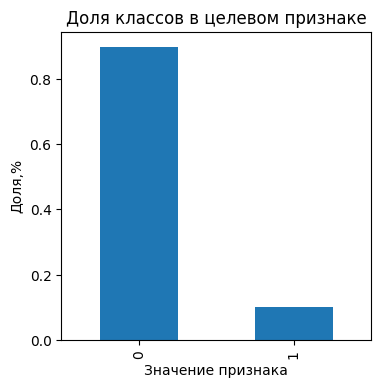

In [10]:
#доля отрицательных и положительных классов в целевом признаке (toxic)
display(df['toxic'].value_counts(normalize=1))
df['toxic'].value_counts(normalize=1).plot(kind='bar', figsize = (4,4),
                                            title = 'Доля классов в целевом признаке',
                                            xlabel = 'Значение признака',
                                           ylabel = 'Доля,%')

В целевом признаке наблюдается явный дисбаланс: 10% со значением 1 и практиески 90% данных со значением 0. Смещение данных  к отрицательному значению.

Приведем данные к нужному формату, для этого:

    1. лемматизируем данные 
    2. отчистим текст от знаков и пробелов 
    3. избавимся от стоп-слов 
    4. переведем в вектор(получение TF-IDF для корпуса текста)

In [11]:
import nltk  #загрузка стоп слов 
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olgafomina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olgafomina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Лучше все импорты собрать в одном месте

</div>

<div class="alert alert-block alert-info">

<b>Комментарий студента: </b> Спасибо) исправлено
</div>

In [12]:
#загрузка стоп-слов
stop_words = set(stopwords.words('english'))

In [13]:
#функция лемматизации и очистки символов (с помощью spacy)

nlp = spacy.load("en_core_web_sm") #инициалиация spacy модели
def lemmatize(text):
    text = text.lower() #перевод в строчные буквы
    doc = nlp(text) #лемматизация
    lemm_text = " ".join([token.lemma_ for token in doc])#оъединение элементов списка(токены) в строки,разделив пробелом
    text_clear = re.sub(r'[^a-zA-z ]', ' ', text) #замена текста, не входящих в шаблон на пробелы 
    lemm_text_clear = ' '.join(text_clear.split())
    return lemm_text_clear



In [14]:
#проверка
print(df['text'][0])
print()
print(lemmatize(df['text'][0]))

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now


In [16]:
#для загрузки progress_apply 
from tqdm.notebook import tqdm
tqdm.pandas()

In [15]:
%%time
#запуск функции на весь текст
df['lemm_text'] = df['text'].progress_apply(lemmatize)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: user 29min 15s, sys: 1min 54s, total: 31min 10s
Wall time: 31min 13s


In [16]:
#проверка
display(df.sample(5))

,text,toxic,lemm_text
72173,"Interwiki's \n\nHello Ghaly, Your bot added the wrong interwiki's on a Dutch template. I do not know the exact reason for this one, but please remove on all the other projects the interwiki to because these are other kind of templates. They share the same name, but on nl-wiki we use another system, and the content is different: = . If you can't do the interwiki's right on nl-wiki-templates, do not do them there at all. Thank you. Greetings -",0,interwiki s hello ghaly your bot added the wrong interwiki s on a dutch template i do not know the exact reason for this one but please remove on all the other projects the interwiki to because these are other kind of templates they share the same name but on nl wiki we use another system and the content is different if you can t do the interwiki s right on nl wiki templates do not do them there at all thank you greetings
4723,Sorry I must have been reading something else. I think those === are needed only when posting for disciplines with own articles (diving for ex.) But for cycling we can also remove them since they are all in one article. Also for team sport rosters there will be templates for each of them.,0,sorry i must have been reading something else i think those are needed only when posting for disciplines with own articles diving for ex but for cycling we can also remove them since they are all in one article also for team sport rosters there will be templates for each of them
72267,"""\n\n Chimp - You Need To Learn Some Respect \n\n Civility Warning\nIt is important to keep a cool head, especially when responding to comments against you or your edits. Personal attacks and disruptive comments only escalate a situation; please keep calm and remember that action can be taken against other parties if necessary. Attacking another user back can only satisfy trolls or anger contributors and leads to general bad feeling. Please try to remain civil with your comments. Thanks! \n\nI've been reviewing your pattern of recent edits and see a lot of comments that could be interpretted as extremely incivil. I'd encourage you to assume good faith on the part of other editors, particularly in the maintenance of this talk page and your responses to other users on both their talk pages and in AfDs. Thank you ). (talk) \nWarning Removal\nPlease do not remove legitimate warnings from your talk page or replace them with inappropriate content. Removing or maliciously altering warnings from your talk page will not remove them from the page history. You're welcome to archive your talk page, but be sure to provide a link to any deleted legitimate comments. If you continue to remove or vandalize legitimate warnings from your talk page, you will lose your privilege of editing your talk page. Thanks. (talk) \n\nI would suggest that you lay off my personal talk page ....\n\nLike anyone who actually understood what it means to be civil and polite, which you apparently do not.\n\n 20:35, 17 September 2006""",0,chimp you need to learn some respect civility warning it is important to keep a cool head especially when responding to comments against you or your edits personal attacks and disruptive comments only escalate a situation please keep calm and remember that action can be taken against other parties if necessary attacking another user back can only satisfy trolls or anger contributors and leads to general bad feeling please try to remain civil with your comments thanks i ve been reviewing your pattern of recent edits and see a lot of comments that could be interpretted as extremely incivil i d encourage you to assume good faith on the part of other editors particularly in the maintenance of this talk page and your responses to other users on both their talk pages and in afds thank you talk warning removal please do not remove legitimate warnings from your talk page or replace them with inappropriate content removing or maliciously altering warnings from your talk page will 

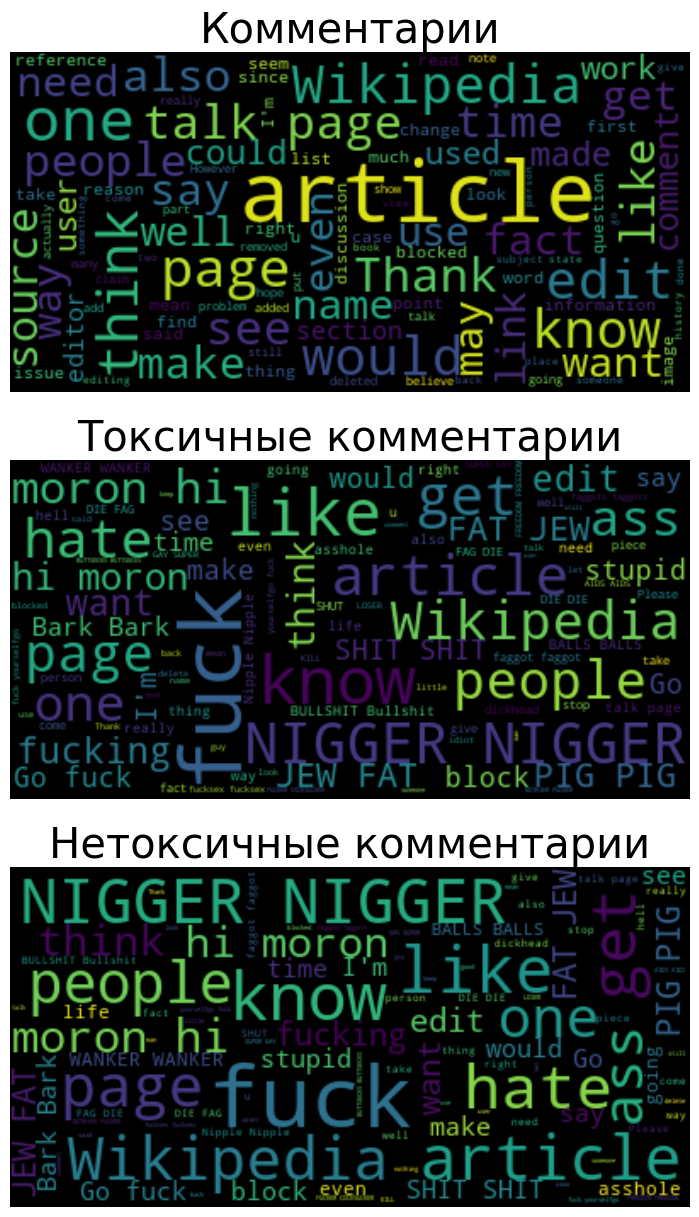

In [17]:
#визуализация наиболее потребимых слов
df_toxic = df[df['toxic']==1]
df_all = df[df['toxic']==1]

all_word = " ".join(review for review in df.text)
toxic_com = " ".join(review for review in df_toxic.text)
not_toxic = " ".join(review for review in df_all.text)
fig,ax = plt.subplots(3,1,figsize=(20,15))
wordcloud_inn =  WordCloud(max_font_size=50, max_words=100, background_color='black',
                           stopwords=stop_words).generate(all_word)
wordcloud_toxic =  WordCloud(max_font_size=50, max_words=100, background_color='black',
                           stopwords=stop_words).generate(toxic_com)
wordcloud_all =  WordCloud(max_font_size=50, max_words=100, background_color='black',
                           stopwords=stop_words).generate(not_toxic)
ax[0].imshow(wordcloud_inn, interpolation='bilinear')
ax[0].set_title('Комментарии', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_toxic, interpolation='bilinear')
ax[1].set_title('Токсичные комментарии', fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_all, interpolation='bilinear')
ax[2].set_title('Нетоксичные комментарии', fontsize=30)
ax[2].axis('off')
plt.show();

In [178]:
#print(tf_idf.shape)

(159292, 162441)


In [18]:
#деление на признаки и целевой признак
features = df['lemm_text']
target = df['toxic']
print(features.shape)
print(target.shape)

(159292,)
(159292,)


In [19]:
#деление на выборки, c использованием аргумента stratify(для озранения изначального распределения таргетов)
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                              test_size=0.2, 
                                                                              random_state=12345,
                                                                            stratify=target)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(127433,)
(31859,)
(127433,)
(31859,)


### Вывод:


В ходе подготовки данных:
1. выявлен дисбаланс данных в целевом признаке(90% со значением 0, и 10% со значением 1)
2. данные обработаны, лемматизированы, очищены от лишних символов( знаки препинания, лишние пробелы), приведены к формату TF-IDF (количество упоминаний слова в тексте)
3. подготовлены для дальнейшего обучения ( выделены признаки и целевой признак, данные разделены на обучающую выборку (80%) и тестовую(20%)
4. Визуализированы часто употребляемые слова


## Обучение

In [20]:
# гиперпараметры(для подбора в GridSearch)
model_lr = LogisticRegression(random_state=12345, class_weight='balanced')

model_forest = RandomForestClassifier(random_state=12345, class_weight='balanced')
model_catboost = CatBoostClassifier( logging_level='Silent')#silent=True, loss_function='R1'
model_lgbm = LGBMClassifier(boosting_type='gbdt', seed=12345, class_weight='balanced')


parameters_lr = {"model__C":[0.1, 1.0, 10.0],
                'model__solver': ['lbfgs', 'newton-cg', 'sag'],
                'model__max_iter': [1000]}
parameters_forest = {'model__max_depth': [200],
                 'model__n_estimators': [50, 100]}
parameters_catboost = {'model__iterations': [50,60],
                'model__depth':[2,5],
                  'model__learning_rate': [0.05, 0.1]}
parameters_lgbm = {'model__n_estimators': [100],
                'model__max_depth':[4],
                  'model__learning_rate': [0.1]}

In [21]:
#функция для запуска обучения
def pipeline_grid(model, features_train, target_train, parameters):
    pipeline = Pipeline(
        [('vect_tfidf', TfidfVectorizer(stop_words=stop_words)),#ngram_range=(1,2))),
         ('model',model)])
    grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=parameters ,scoring='f1', error_score='raise')
    grid.fit(features_train, target_train)

    F1 = grid.best_score_
    best_params = grid.best_params_

    print(f'F1:', round(F1, 3))
    print("Параметры лучшей модели:", best_params) 
    return grid

### Логистическая регрессия

In [22]:
%%time

lr_mod = pipeline_grid(model_lr, features_train, target_train, parameters_lr)


/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/olgafomina/opt/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarni

F1: 0.766
Параметры лучшей модели: {'model__C': 10.0, 'model__max_iter': 1000, 'model__solver': 'lbfgs'}
CPU times: user 1min 20s, sys: 49 s, total: 2min 9s
Wall time: 3min 40s


### Случайный лес

In [36]:
%%time
forest_mod = pipeline_grid(model_forest, features_train, target_train, parameters_forest)

F1: 0.587
Параметры лучшей модели: {'model__max_depth': 200, 'model__n_estimators': 100}
CPU times: user 4min 37s, sys: 1.9 s, total: 4min 39s
Wall time: 13min 50s


### CatBoost

In [37]:
%%time
catboost_mod = pipeline_grid(model_catboost, features_train, target_train, parameters_catboost)

F1: 0.585
Параметры лучшей модели: {'model__depth': 5, 'model__iterations': 60, 'model__learning_rate': 0.1}
CPU times: user 4min 6s, sys: 15.4 s, total: 4min 21s
Wall time: 23min 43s


### LightGBM

In [ ]:
#%%time
#lgbm_mod = pipeline_grid(model_lgbm, features_train, target_train, parameters_lgbm)

### Dummy

In [23]:
model = DummyClassifier(strategy = 'constant', constant = 1)

model.fit(features_train, target_train)
pred = model.predict(features_test)
f1_dummy = f1_score(target_test, pred)
print('F1 Dummy: ', round(f1_dummy, 2))

F1 Dummy:  0.18


Но любая наша модель пресказывает лучше дамми-модели, и это успех.

In [27]:
# Посмотрим наши предварительные результаты
total_tabl = pd.DataFrame(index=['F1-мера'], columns=['LogisticRegression','RandomForestClassifier',
                                                      'CatBoostClassifier', 'DummyClassifier'])
total_tabl['LogisticRegression'] = 0.766
total_tabl['RandomForestClassifier'] = 0.587
total_tabl['CatBoostClassifier'] = 0.585

total_tabl['DummyClassifier'] = 0.18
total_tabl.T

,F1-мера
LogisticRegression,0.766
RandomForestClassifier,0.587
CatBoostClassifier,0.585
DummyClassifier,0.180


### Проверка на тестовой выборке

Лучше всего сработала модель LogisticRegression, протестируем ее на тестовой выборке

In [29]:
result_test = f1_score(target_test, lr_mod.predict(features_test))
print("Результат F1 LogisticRegression на тестовой выборке", round(result_test,3))

Результат F1 LogisticRegression на тестовой выборке 0.776


## Выводы

Обучены три разные модели (LogisticRegression, RandomForestClassifier,CatBoostClassifier) 
Согласно метрике F1 лучше всего себя показала модель  LogisticRegression с векторизацией данных TF-IDF:: F1 = 0.766 на обучающей выборке, и F1=0.776 на тестовой выборке.
Самый высокий f1 у LogisticRegression